In [ ]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# importing all applicable libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import platform
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn import preprocessing, mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.cluster import adjusted_rand_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import itertools
from scipy import linalg



message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=1.0.2
Numpy version=1.21.6
Pandas version=1.3.5
Matplotlib version=3.2.2
Python version=3.7.13


# **Importing Dataset**

In [ ]:
# Importing the wine dataset and reading it
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None,
    sep=',')

df.columns=['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
            'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Exploratory Data Analysis**

In [ ]:
# Check for missing values in dataset
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


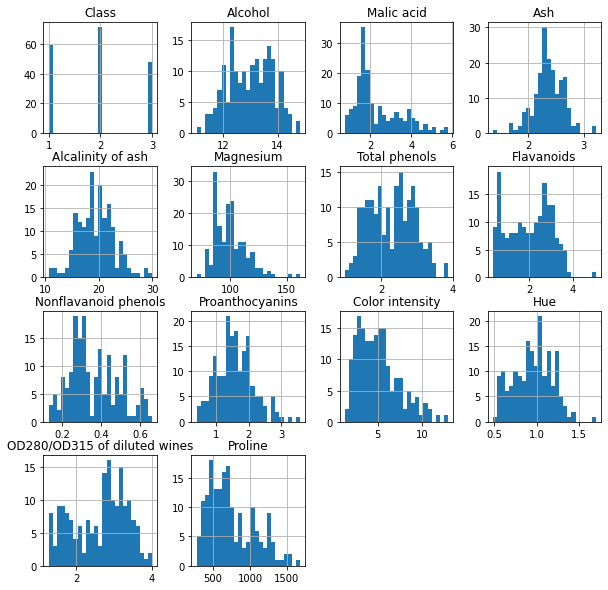

In [ ]:
# display histogram
df.hist(bins=25,figsize=(10,10))

plt.show()

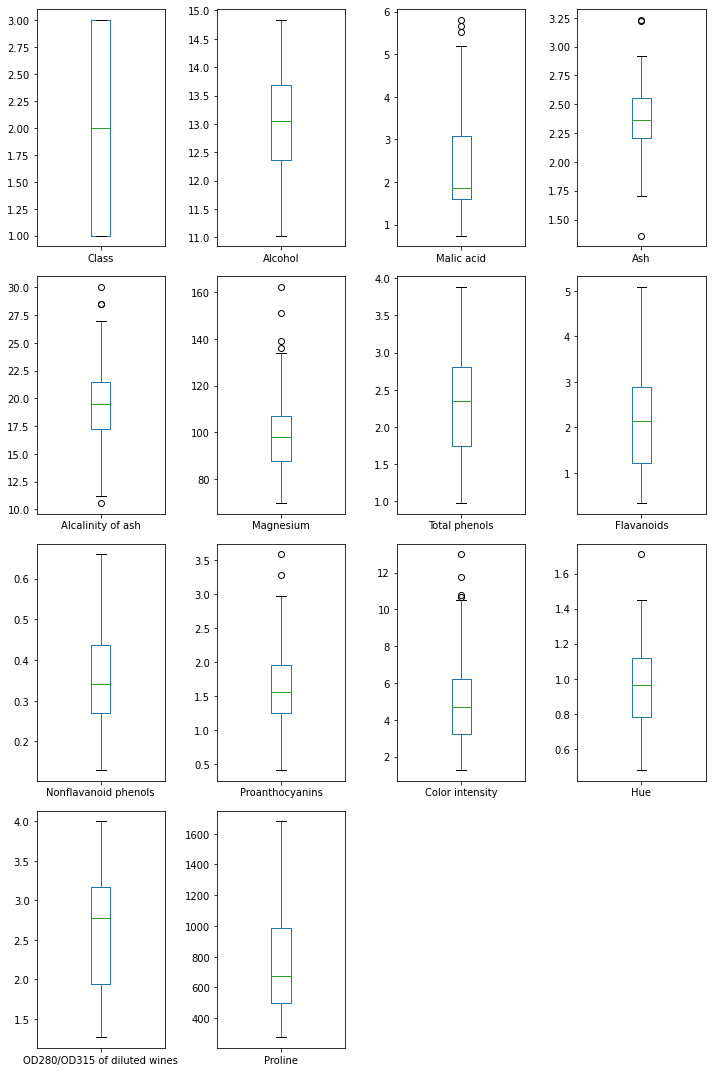

In [ ]:
plt.figure(figsize=(10,15))
for x,y in enumerate(list(df.columns.values)):
  plt.subplot(4,4,x+1)
  df.boxplot(y)
  plt.grid()
  plt.tight_layout()

# **Data Preparation** 

In [ ]:
# Dropping Class column from data 
X = pd.DataFrame(df.drop(['Class'], axis = 1))
ylabel = df['Class']

In [ ]:
# Scaling the data
std_scale = preprocessing.StandardScaler().fit(X)
df_std = std_scale.transform(X)
data = pd.DataFrame(df_std, columns = X.columns)
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# **Using PCA Analysis**

We first analyze the cumulative explained ratio variance of all the Principal Components



In [ ]:
pca = PCA(n_components=12, random_state=42)
pca_result = pca.fit_transform(data)
print('Explained variation per component: {}\n'.format(pca.explained_variance_ratio_))

print('Cumulative explained variance of the components: {}\n'.format(pca.explained_variance_ratio_.cumsum()))

print("Shape of pca_result:")
print(pca_result.shape)

Explained variation per component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233]

Cumulative explained variance of the components: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785]

Shape of pca_result:
(178, 12)


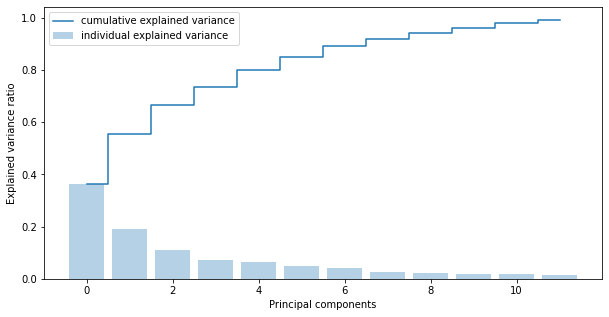

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance')
plt.step(range(len(np.cumsum(pca.explained_variance_ratio_))),np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()


In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data)
print('Explained variation per component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
print("Shape of pca_result:")
print(pca_result.shape)

Explained variation per component: [0.36198848 0.1920749 ]
Cumulative variance explained by 2 principal components: 55.41%
Shape of pca_result:
(178, 2)


In [ ]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca.components_), columns=data.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)
    
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")



        Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PC_1  0.144329    0.245188  0.002051           0.239320   0.141992   
PC_2  0.483652    0.224931  0.316069           0.010591   0.299634   

      Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
PC_1       0.394661    0.422934              0.298533         0.313429   
PC_2       0.065040    0.003360              0.028779         0.039302   

      Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
PC_1         0.088617  0.296715                      0.376167  0.286752  
PC_2         0.529996  0.279235                      0.164496  0.364903  

*************** Most important features *************************
As per PC 1:
 Total phenols                   0.394661
Flavanoids                      0.422934
Proanthocyanins                 0.313429
OD280/OD315 of diluted wines    0.376167
Name: PC_1, dtype: float64


As per PC 2:
 Alcohol            0.483652
Ash                0.3160

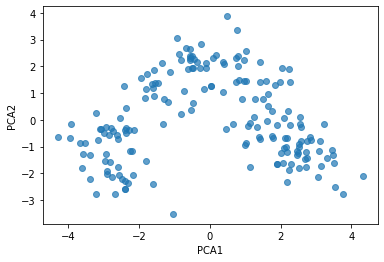

In [ ]:
# Visualize results of PCA1 and PCA2
data_pca = pd.DataFrame(pca_result)
plt.scatter(x=data_pca.iloc[:,0],
y=data_pca.iloc[:,1],
alpha = 0.7)
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.show()

# **Using K-means clustering**

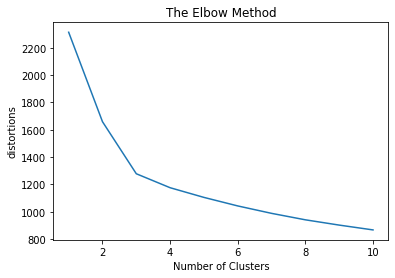

In [ ]:
# Find the optimum number of clusters by deriving the inertia scores and plotting the graph using the elbow method
distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    label = kmeans.labels_

    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 11),distortions)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('distortions')
plt.show()

# As seen from here, k=3 is the optimum number of clusters

In [ ]:
# Print silhouette coefficients
distortions = []
X=data
for i in range(2,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(
i, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.26831340971052126
For n_clusters=3, The Silhouette Coefficient is 0.2848589191898987
For n_clusters=4, The Silhouette Coefficient is 0.25173343011696475
For n_clusters=5, The Silhouette Coefficient is 0.2271732547624458
For n_clusters=6, The Silhouette Coefficient is 0.19582485390848947
For n_clusters=7, The Silhouette Coefficient is 0.20913005310687274
For n_clusters=8, The Silhouette Coefficient is 0.13581656516941268
For n_clusters=9, The Silhouette Coefficient is 0.14576057110571292
For n_clusters=10, The Silhouette Coefficient is 0.13394527355239233
For n_clusters=11, The Silhouette Coefficient is 0.1415050320596543


As shown from the silhouette scores, the most optimum number of clusters is n=3.

In [ ]:
# fit a Kmeans model to the PCA data
model = KMeans(n_clusters=3)
model.fit(data)
print(model)

KMeans(n_clusters=3)


In [ ]:
# Printing results of kMeans model
label_KM = model.labels_
print("Labels predicted by K-Means:",label_KM)


centers = model.cluster_centers_
print("Shape of centroids_KM",centers.shape)
print("Centroids:",centers)

inertia_KM = model.inertia_
print("Inertia:",inertia_KM)

Labels predicted by K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Shape of centroids_KM (3, 13)
Centroids: [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
Inertia: 1277.9284888446423


KMeans(n_clusters=3, random_state=42)


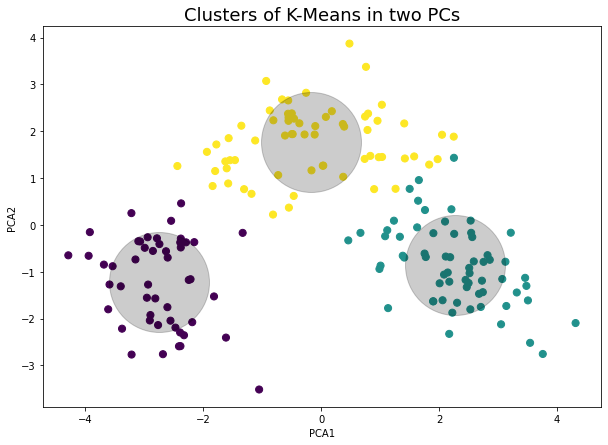

In [ ]:
# fit a Kmeans model to the PCA data
kpca_model = KMeans(n_clusters=3, random_state=42)
kpca_model.fit(pca_result)
print(kpca_model)

# Visualize the results
X = pca_result
y_pcakmeans = kpca_model.predict(X)

# Plotting the scatterplot
plt.figure(figsize=(10, 7))  

plt.scatter(X[:, 0], X[:, 1], c=y_pcakmeans, s=50, cmap='viridis')
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.title('Clusters of K-Means in two PCs', fontsize=18)

# show centroid centres as grey circle opacity 50%
centers = kpca_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10000, alpha=0.2)

In [ ]:
#  Labels predicted by KMeans + PCA
label_KMpca = kpca_model.labels_
print("Labels predicted by KM+PCA:",label_KMpca)

print("Shape of centroids_KM",centers.shape)
print("Centroids:",centers)

inertia_KMpca = kpca_model.inertia_
print("Inertia:",inertia_KMpca)

Labels predicted by KM+PCA: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Shape of centroids_KM (3, 2)
Centroids: [[-2.74392982 -1.2141906 ]
 [ 2.26614991 -0.86559213]
 [-0.16278513  1.76758824]]
Inertia: 259.509380751193


# **Using Gaussian Mixture Model**

In [ ]:
# Printing results of GMM model
gmm = GaussianMixture(n_components = 3, random_state=42)
gmm_model = gmm.fit(data)

weights_GMM = gmm_model.weights_
print("Weights:",weights_GMM)
means_GMM = gmm_model.means_
print("Means:",means_GMM)
covariance_GMM = gmm_model.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))
covariance_GMM.size

label_pred_GMM = gmm_model.predict(data)
print("Labels predicted by GMM:",label_pred_GMM)
print('Length of labels is same as data entry', label_pred_GMM.shape)



Weights: [0.3580442  0.35563555 0.28632025]
Means: [[-0.94194964 -0.36665974 -0.39337021  0.25121283 -0.57289459 -0.03349368
   0.08136144  0.01323491  0.00779434 -0.88476972  0.43434413  0.29281555
  -0.78131234]
 [ 0.81535193 -0.33244352  0.2448001  -0.67576135  0.63685313  0.82213961
   0.89675273 -0.59782121  0.61971204  0.13188764  0.50056412  0.74602428
   1.11395195]
 [ 0.16516987  0.87143373  0.18784666  0.52521419 -0.07462282 -0.97928753
  -1.21559036  0.72599751 -0.77948503  0.94259045 -1.16489416 -1.29279595
  -0.4065956 ]]
Type of covariance_GMM: <class 'numpy.ndarray'>
Labels predicted by GMM: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Length of labels is same

In [ ]:
# Printing results of GMM + PCA model
gmm_pca = GaussianMixture(n_components = 3, random_state=42)
gmm_pca_model = gmm.fit(pca_result)

weights_GMM = gmm_pca_model.weights_
print("Weights:",weights_GMM)
means_GMM = gmm_pca_model.means_
print("Means:",means_GMM)
covariance_GMM = gmm_pca_model.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))
covariance_GMM.size

label_pred_GMMpca = gmm_pca_model.predict(pca_result)
print("Labels predicted by GMM + PCA:",label_pred_GMMpca)
print('Length of labels is same as data entry', label_pred_GMMpca.shape)



Weights: [0.38068048 0.26913256 0.35018695]
Means: [[-0.13128107  1.71090924]
 [-2.76625789 -1.23789567]
 [ 2.26869167 -0.90851963]]
Type of covariance_GMM: <class 'numpy.ndarray'>
Labels predicted by GMM + PCA: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Length of labels is same as data entry (178,)


Text(0.5, 1.0, 'Clusters of GMM in two PCs')

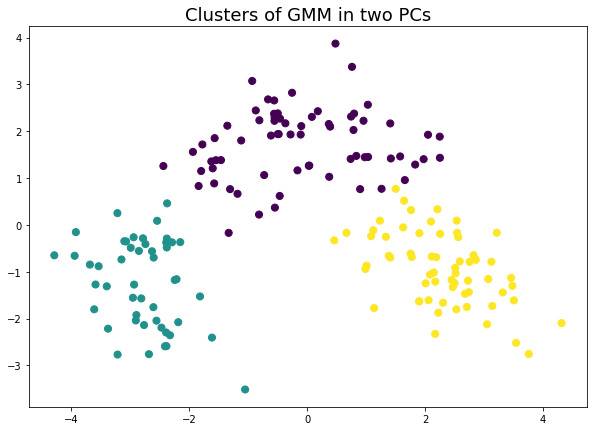

In [ ]:
# Visualize the results
X = pca_result
y_gmm = gmm_model.predict(X)

# Plotting the scatterplot
plt.figure(figsize=(10, 7))  
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Clusters of GMM in two PCs', fontsize=18)

# **Using Hierchical clustering**

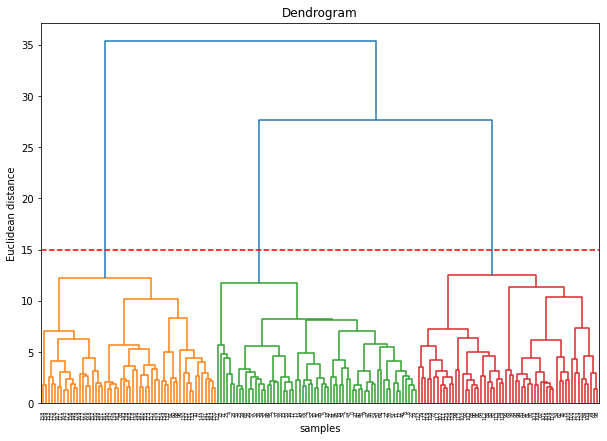

In [ ]:
# Dendogram to find the optimal number of clusters 
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.hlines(15,0,5000,colors='r',linestyle='--') #Red line at Euclidean distance = 15 as that is the maximum distance between both blue lines
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Using Agglomerative Clustering
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(data)
hc_model_labels = clustering_model.labels_

# Printing results of the model
print("Labels predicted by Clustering model:\n",hc_model_labels)
print('Length of labels is same as data entry', hc_model_labels.shape)

Labels predicted by Clustering model:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Length of labels is same as data entry (178,)


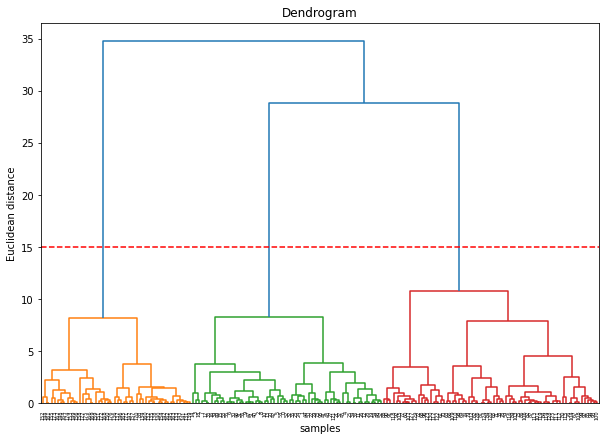

In [ ]:
# Dendogram to find the optimal number of clusters under PCA dataset
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_result,method='ward'))
plt.hlines(15,0,5000,colors='r',linestyle='--') #Red line at Euclidean distance = 15 as that is the maximum distance between both blue lines
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Using Agglomerative Clustering under PCA
hcpca_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcpca_model.fit(pca_result)
hcpca_model_labels = hcpca_model.labels_

# Printing results of the model (Hierachical Clustering + PCA)
print("Labels predicted by Clustering + PCA model:\n",hcpca_model_labels)
print('Length of labels is same as data entry', hcpca_model_labels.shape)

Labels predicted by Clustering + PCA model:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Length of labels is same as data entry (178,)


# **Evaluation of various models**

Silhouette score of cluster by KMeans : 0.2848589191898987
Silhouette score of cluster by KMeans + PCA : 0.2831143774741039
Silhouette score of cluster by GMM : 0.2844212860533542
Silhouette score of cluster by GMM + PCA : 0.28290450640881715
Silhouette score of cluster by Hierachical Clustering : 0.2774439826952265
Silhouette score of cluster by Hierachical Clustering + PCA : 0.28290450640881715


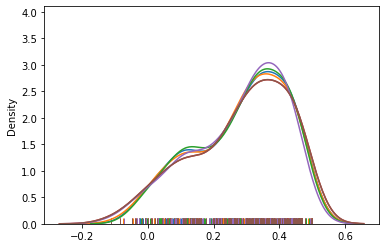

In [ ]:
# Through silhouette scores

#1. Kmeans
sh_score_KM = silhouette_score(data, label_KM)
print("Silhouette score of cluster by KMeans :",sh_score_KM)
sh_scores_KM = silhouette_samples(data, label_KM)
p1=sns.distplot(sh_scores_KM, hist=False, rug=True,label = 'KM');

#2. Kmeans + PCA
sh_score_KM_PCA = silhouette_score(data, label_KMpca)
print("Silhouette score of cluster by KMeans + PCA :",sh_score_KM_PCA)
sh_scores_KM_PCA = silhouette_samples(data, label_KMpca)
p2=sns.distplot(sh_scores_KM_PCA, hist=False, rug=True, label = 'KM+PCA');

#3. GMM
sh_score_GMM = silhouette_score(data, label_pred_GMM)
print("Silhouette score of cluster by GMM :",sh_score_GMM)
sh_scores_GMM = silhouette_samples(data, label_pred_GMM)
p3=sns.distplot(sh_scores_GMM, hist=False, rug=True, label = 'GMM');

#4. GMM + PCA
sh_score_GMM_PCA = silhouette_score(data, label_pred_GMMpca)
print("Silhouette score of cluster by GMM + PCA :",sh_score_GMM_PCA)
sh_scores_GMM_PCA = silhouette_samples(data, label_pred_GMMpca)
p4=sns.distplot(sh_scores_GMM_PCA, hist=False, rug=True, label = 'GMM + PCA');

#5. Hierachical Clustering
sh_score_Clus = silhouette_score(data, hc_model_labels)
print("Silhouette score of cluster by Hierachical Clustering :",sh_score_Clus)
sh_scores_Clus = silhouette_samples(data, hc_model_labels)
p4=sns.distplot(sh_scores_Clus, hist=False, rug=True, label = 'HC');

#6. Hierachical Clustering + PCA
sh_score_HC_PCA = silhouette_score(data, hcpca_model_labels)
print("Silhouette score of cluster by Hierachical Clustering + PCA :",sh_score_GMM_PCA)
sh_scores_HC_PCA = silhouette_samples(data, hcpca_model_labels)
p4=sns.distplot(sh_scores_GMM_PCA, hist=False, rug=True, label = 'HC + PCA');

In [ ]:
# Using rand index adjusted for chance
ar_score_KM = adjusted_rand_score(ylabel, label_KM)
print("Adjusted Rand Index of cluster by KMeans :",ar_score_KM)

ar_score_KM_PCA = adjusted_rand_score(ylabel, label_KMpca)
print("Adjusted Rand Index of cluster by KMeans + PCA:",ar_score_KM_PCA)

ar_score_GMM = adjusted_rand_score(ylabel, label_pred_GMM)
print("Adjusted Rand Index of cluster by GMM:",ar_score_GMM)

ar_score_GMM_PCA = adjusted_rand_score(ylabel, label_pred_GMMpca)
print("Adjusted Rand Index of cluster by GMM + PCA:",ar_score_GMM_PCA)

ar_score_AC = adjusted_rand_score(ylabel, hc_model_labels)
print("Adjusted Rand Index of cluster by Hierachical Clustering:",ar_score_AC)

ar_score_HC_PCA = adjusted_rand_score(ylabel, hcpca_model_labels)
print("Adjusted Rand Index of cluster by Hierachical Clustering + PCA:",ar_score_HC_PCA)

Adjusted Rand Index of cluster by KMeans : 0.8974949815093207
Adjusted Rand Index of cluster by KMeans + PCA: 0.8950582389649661
Adjusted Rand Index of cluster by GMM: 0.8803997758776985
Adjusted Rand Index of cluster by GMM + PCA: 0.9135013666962891
Adjusted Rand Index of cluster by Hierachical Clustering: 0.7899332213582837
Adjusted Rand Index of cluster by Hierachical Clustering + PCA: 0.8960646870999063


As seen from the rand index scores, GMM+PCA model seems to yield the best results

References:

1. Anil Kumar K. "Complete Analysis of WINE Data set
". Retrieved, July 15 2022 from https://rpubs.com/Kanasani/724932 https://github.com/vincent27hugh/Cluster-Kmeans-EMGMM-PCA

2. Mayur B. "Wine Quality Prediction Using Machine Learning". Retrieved, July 20 2022 from https://www.analyticsvidhya.com/blog/2021/04/wine-quality-prediction-using-machine-learning/

3. Shreya S. "Exploratory Data Analysis on Wine Data Set". Retrieved, July 20 2022 from https://medium.com/@shreyasrivastav26/exploratory-data-analysis-on-wine-data-set-46ff17a42cd4